# First Moment of a Function of Random Variable

## Example: Average Force

Consider the previous Example: Exponential Distribution of Force Derived from Accelerated Motion.
Now, we want to find the _average force_, which can be computed directly from the PDF of the force.

The property being referred to is the **expectation property** which states that the expected value of a function of a random variable can be computed as the integral of that function with respect to the probability density function (PDF) of the random variable.

Mathematically, if $ \mathbf{x} $ is a random variable with PDF $ p_{\mathbf{x}}(x) $, and $ g(\mathbf{x}) $ is a certain function of $ \mathbf{x} $, then the expected value of $ g(\mathbf{x}) $ is given by:

$$
E\{\mathbf{x}\}=\int_{-\infty}^{\infty}xf_{\mathbf{x}}(x)dx
$$

$$
E\{g(\mathbf{x})\} = \int_{-\infty}^{\infty} g(\mathbf{x}) p_{\mathbf{x}}(x) dx
$$

In the context of this example, i.e., to find the _average force_, the function $ g(x) $ corresponds to the force $ \mathbf{f} = m \mathbf{a} $. The property of expectation is used as follows:

- **Direct method**: Compute $ E\{\mathbf{f}\} $ directly by integrating $ f $ multiplied by the PDF of $ \mathbf{f} $:

   $$
   E\{\mathbf{f}\} = \int_{0}^{\infty} f \frac{\lambda}{m} e^{-\lambda f/m} df = \frac{m}{\lambda}
   $$

- **Using the linearity of expectation**: Since $ \mathbf{f} = m \mathbf{a} $, the expected value of $ \mathbf{f} $ can be written as:

   $$
   E\{\mathbf{f}\} = E\{m \mathbf{a}\} = mE\{\mathbf{a}\}
   $$

   Here, $ E\{\mathbf{a}\} $ is the expected value of the acceleration, which can also be calculated using the integral:

   $$
   E\{\mathbf{a}\} = \int_{0}^{\infty} a \lambda e^{-\lambda a} da = \frac{1}{\lambda}
   $$

   Thus,

   $$
   E\{ \mathbf{f} \} = m \cdot \frac{1}{\lambda} = \frac{m}{\lambda}
   $$


## Simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy.integrate import quad

# Parameters
lambda_param = 2  # parameter of the exponential distribution
mass = 3  # mass of the object
num_samples = 10000  # number of samples

# Generate samples of acceleration a
a_samples = np.random.exponential(scale=1/lambda_param, size=num_samples)

# Derive force f from acceleration a
f_samples = mass * a_samples

# Theoretical pdf of force f
def pdf_f(f, lambda_param, mass):
    return (lambda_param / mass) * np.exp(-lambda_param * f / mass) * (f > 0)

# Analytical mean using integral
def integrand(f, lambda_param, mass):
    return f * pdf_f(f, lambda_param, mass)

analytical_mean, _ = quad(integrand, 0, np.inf, args=(lambda_param, mass))

# Generate values for f for theoretical pdf and cdf
f_values = np.linspace(0.01, np.max(f_samples), 1000)  # start from 0.01 to avoid 0
pdf_f_values = pdf_f(f_values, lambda_param, mass)

# Empirical pdf estimation using histogram
hist, bin_edges = np.histogram(f_samples, bins=50, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Empirical cdf estimation
sorted_f_samples = np.sort(f_samples)
empirical_cdf = np.arange(1, num_samples + 1) / num_samples

# Empirical mean of the force
empirical_mean_f = np.mean(f_samples)

# Theoretical mean of the force
theoretical_mean_f = mass / lambda_param

print(f"Empirical mean of the force: {empirical_mean_f}")
print(f"Theoretical mean of the force: {theoretical_mean_f}")
print(f"Analytical mean of the force: {analytical_mean}")

Empirical mean of the force: 1.5194274010005249
Theoretical mean of the force: 1.5
Analytical mean of the force: 1.5


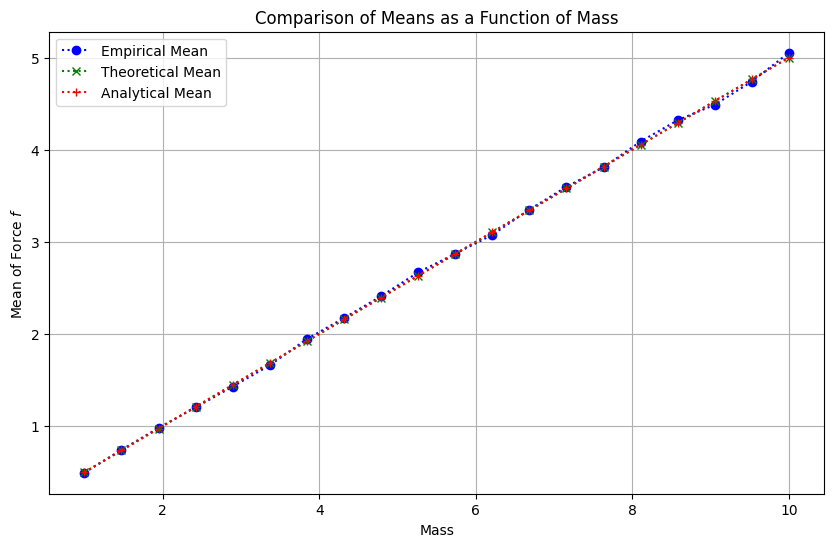

In [2]:
# Parameters for varying mass
mass_values = np.linspace(1, 10, 20)  # Vary mass from 1 to 10 with 20 points

# Initialize lists to store the means
empirical_means = []
theoretical_means = []
analytical_means = []

for mass in mass_values:
    # Generate samples of acceleration a
    a_samples = np.random.exponential(scale=1/lambda_param, size=num_samples)
    
    # Derive force f from acceleration a
    f_samples = mass * a_samples
    
    # Empirical mean of the force
    empirical_mean_f = np.mean(f_samples)
    
    # Theoretical mean of the force
    theoretical_mean_f = mass / lambda_param
    
    # Analytical mean using integral
    analytical_mean, _ = quad(integrand, 0, np.inf, args=(lambda_param, mass))
    
    # Store the results
    empirical_means.append(empirical_mean_f)
    theoretical_means.append(theoretical_mean_f)
    analytical_means.append(analytical_mean)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(mass_values, empirical_means, label='Empirical Mean', linestyle=':', marker='o', color='blue')
plt.plot(mass_values, theoretical_means, label='Theoretical Mean', linestyle=':', marker='x', color='green')
plt.plot(mass_values, analytical_means, label='Analytical Mean', linestyle=':', marker='+', color='red')

plt.title('Comparison of Means as a Function of Mass')
plt.xlabel('Mass')
plt.ylabel('Mean of Force $f$')
plt.legend()
plt.grid(True)
plt.show()
